1. insights about: summerOly_athletes.csv

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
file_path = 'summerOly_athletes.csv'
data = pd.read_csv(file_path)

In [115]:
# Preprocess the data
# 1. Group by gender and medals for the first chart
medals_by_gender = data.groupby(['Sex', 'Medal']).size().unstack(fill_value=0)

# 2. Count participants per year for sports participation over the years
sports_over_years = data.groupby(['Year', 'Sport']).size().unstack(fill_value=0).sum(axis=1)

# 3. Count athletes by country (NOC) and select the top 10
athletes_by_country = data['NOC'].value_counts().head(10)

<Figure size 1000x600 with 0 Axes>

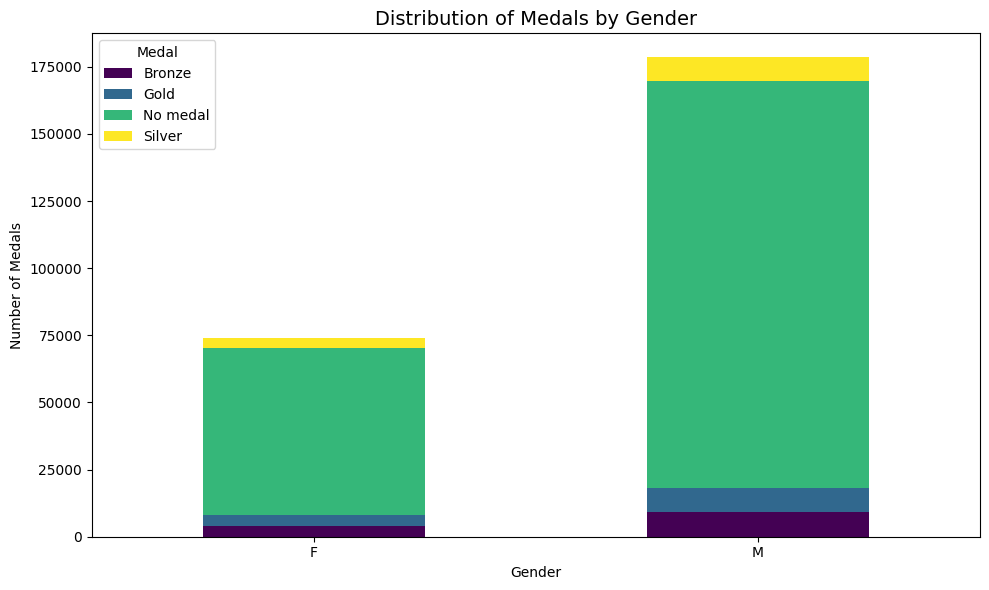

In [116]:
# Plot 1: Distribution of Medals by Gender
plt.figure(figsize=(10, 6))
medals_by_gender.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribution of Medals by Gender', fontsize=14)
plt.ylabel('Number of Medals')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of medals among male (M) and female (F) athletes in the dataset. It reveals a significantly higher number of male participants compared to female participants, as indicated by the overall taller bar for males. The "No Medal" category dominates both genders, showing that most athletes do not win medals. Among medalists, the distribution of Gold, Silver, and Bronze is relatively proportional for both genders, but the total count of medals earned by males far exceeds that of females. This disparity likely reflects historical gender inequality in sports participation, access, or representation at the Olympics.

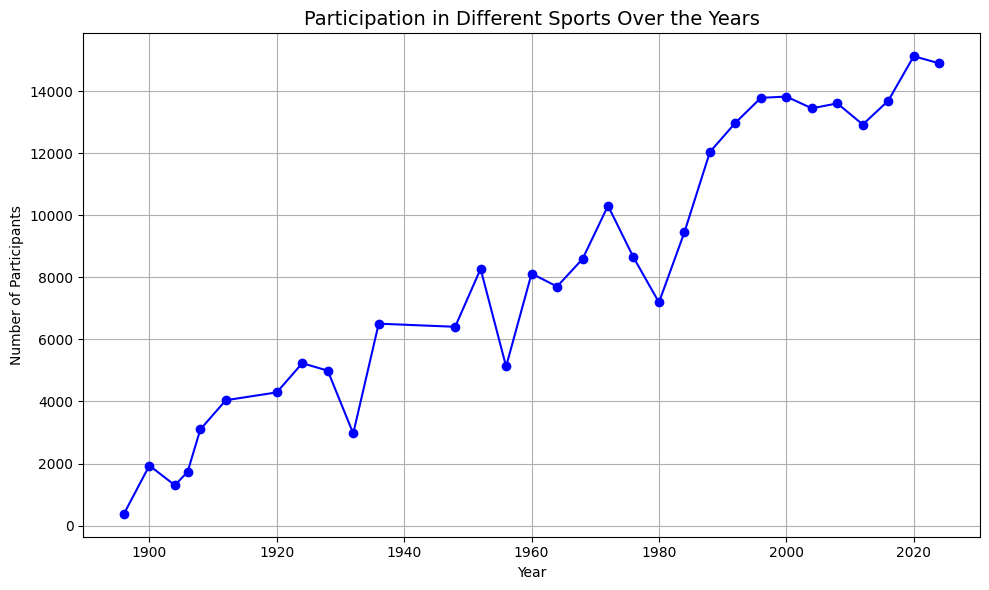

In [117]:
# Plot 2: Participation in Different Sports Over the Years
plt.figure(figsize=(10, 6))
sports_over_years.plot(kind='line', marker='o', color='b')
plt.title('Participation in Different Sports Over the Years', fontsize=14)
plt.ylabel('Number of Participants')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart illustrates the trend of athlete participation in different sports over the years. There is a clear upward trajectory, indicating a steady increase in participation since the early 20th century. Notable drops, such as around the 1940s, likely correspond to disruptions caused by global events like World War II. After these declines, participation rebounded significantly, with sharp growth during the latter half of the 20th century, reflecting the addition of new sports, expanded representation of countries, and the inclusion of female athletes. By the 21st century, participation levels reached their peak, highlighting the Olympics' global appeal and increasing accessibility to athletes worldwide.

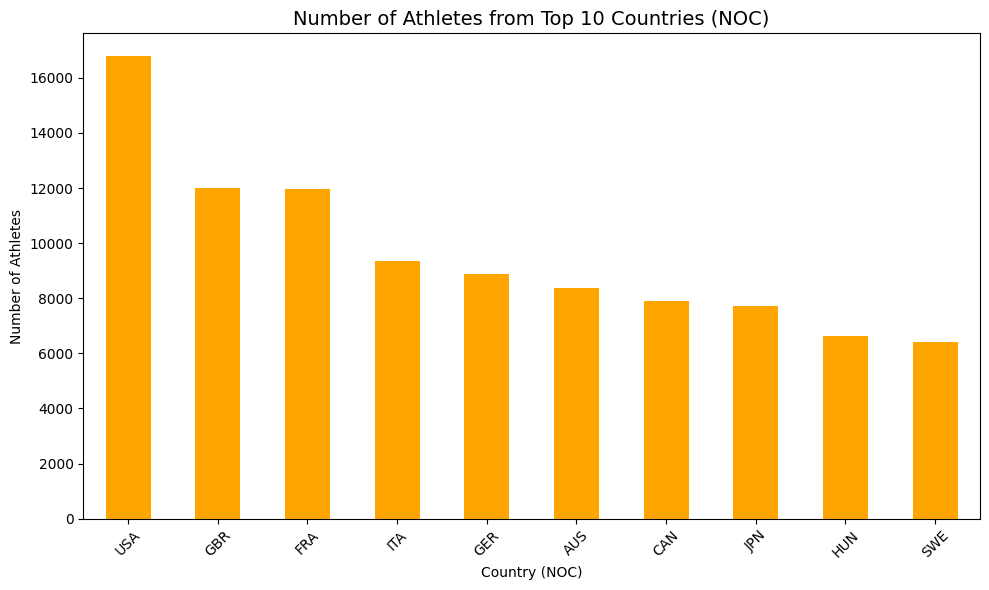

In [118]:
# Plot 3: Number of Athletes from Top 10 Countries
plt.figure(figsize=(10, 6))
athletes_by_country.plot(kind='bar', color='orange')
plt.title('Number of Athletes from Top 10 Countries (NOC)', fontsize=14)
plt.ylabel('Number of Athletes')
plt.xlabel('Country (NOC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart showcases the number of athletes from the top 10 countries (NOCs) participating in the Olympics. The United States leads significantly, with the highest number of athletes, followed by Great Britain (GBR) and France (FRA). Italy (ITA), Germany (GER), and Australia (AUS) make up the middle of the ranking, with a similar number of participants. Canada (CAN), Japan (JPN), Hungary (HUN), and Sweden (SWE) round out the top 10, reflecting strong representation from both Western and Eastern countries. The dominance of the USA highlights its robust sports infrastructure and investment in athletics, while the presence of smaller nations like Hungary and Sweden demonstrates their long-standing traditions of excellence in specific sports.

2: insight about: summerOly_medal_counts.csv.

In [119]:

data2 = pd.read_csv('summerOly_medal_counts.csv')

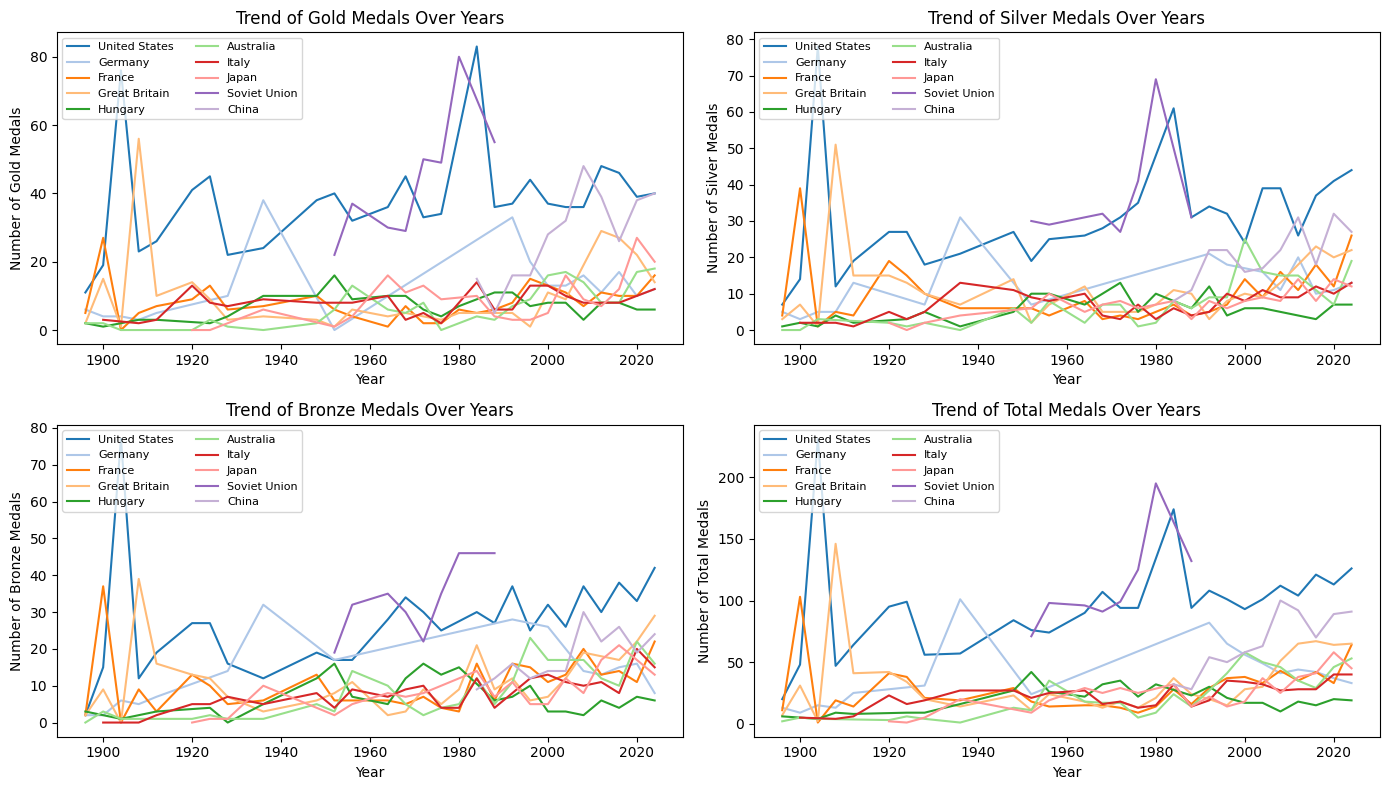

In [120]:
# Filter top 10 countries based on total medal count
top_countries = data2.groupby('NOC')['Total'].sum().nlargest(10).index
filtered_data2 = data2[data2['NOC'].isin(top_countries)]

# Grouping data2 by country and year
countries = filtered_data2['NOC'].unique()

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot trends for each medal type
medal_types = ['Gold', 'Silver', 'Bronze', 'Total']
colors = plt.cm.tab20.colors  # To assign unique colors to countries

for i, medal in enumerate(medal_types):
    plt.subplot(2, 2, i + 1)
    for idx, country in enumerate(countries):
        country_data = filtered_data2[filtered_data2['NOC'] == country]
        plt.plot(country_data['Year'], country_data[medal], label=country, color=colors[idx % len(colors)])

    plt.title(f"Trend of {medal} Medals Over Years")
    plt.xlabel("Year")
    plt.ylabel(f"Number of {medal} Medals")
    plt.legend(loc="upper left", fontsize=8, ncol=2)
    plt.tight_layout()

# Display the plot
plt.show()


The analysis of medal trends for the top 10 countries reveals fascinating insights into their Olympic performances. Countries such as the United States, Soviet Union/Russia, and China demonstrate consistent dominance across gold, silver, and bronze medal categories. The United States, in particular, maintains a significant lead in total medal counts, showcasing its sustained investment in sports development over decades. Similarly, nations like Germany, Great Britain, and France exhibit stable medal trends, with notable surges during specific Olympic events or time periods.

The trends also reflect unique historical patterns, such as the impact of the Soviet Union’s dissolution on Russia's performance and the rise of China as a global sports powerhouse in recent decades. Meanwhile, countries like Australia, Italy, and Japan show steady contributions, often spiking during Olympics held closer to their home regions, which suggests advantages from hosting or geographical proximity. These medal trends underline how political, economic, and cultural factors shape the sporting legacies of these countries and their ability to adapt and compete on the world stage. The visualization highlights these dynamics effectively, offering a rich perspective on the evolution of global sports excellence.

3. insights about summerOly_programs.csv

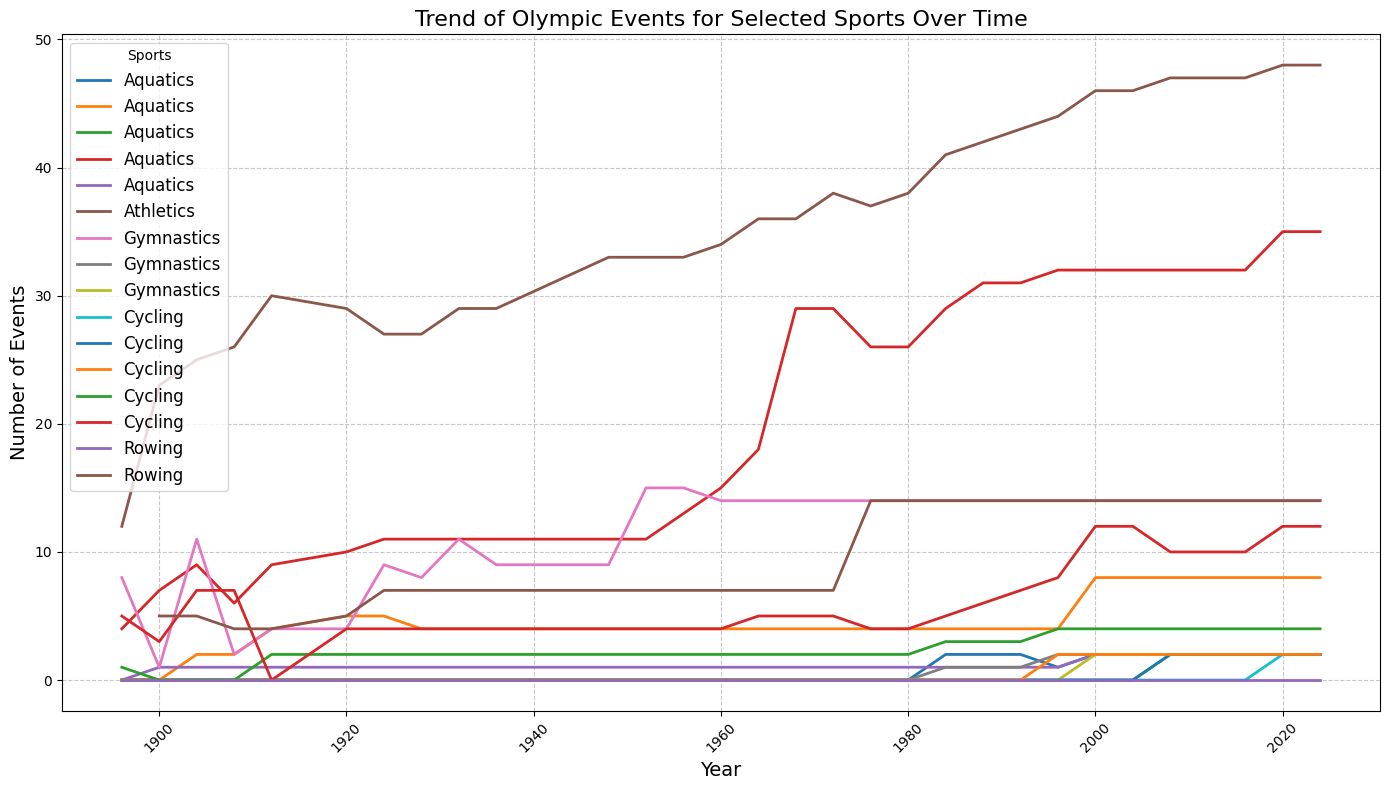

In [121]:


# Load the dataset
data3 = pd.read_csv('summerOly_programs.csv', encoding='latin1')

# Ensure the year columns are numeric and clean the data
numeric_columns = [col for col in data3.columns if col.isdigit()]
selected_sports = ['Aquatics', 'Athletics', 'Gymnastics', 'Cycling', 'Rowing']
trend_data_cleaned = data3[data3['Sport'].isin(selected_sports)].copy()
trend_data_cleaned[numeric_columns] = trend_data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Transpose the year data for plotting trends
trend_years_cleaned = trend_data_cleaned.set_index('Sport').loc[:, numeric_columns].transpose()
trend_years_cleaned.index = trend_years_cleaned.index.astype(int)

# Plotting trends over time for selected sports
plt.figure(figsize=(14, 8))
for sport in selected_sports:
    if sport in trend_years_cleaned.columns:
        plt.plot(trend_years_cleaned.index, trend_years_cleaned[sport], label=sport, linewidth=2)

plt.title('Trend of Olympic Events for Selected Sports Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.legend(title='Sports', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



From the analysis of Olympic events data, a clear picture of the growth and diversification of sports over time emerges. The bar chart highlighting the total number of events by sport shows that sports such as Aquatics, Athletics, and Gymnastics dominate in terms of the number of events offered. This dominance likely reflects their universal appeal, the wide variety of disciplines within these categories, and their historical significance in the Olympic Games. For instance, swimming and athletics have been central to the Olympics since its inception, with consistent additions of new events over time.

The trend analysis over time for selected sports—Aquatics, Athletics, Gymnastics, Cycling, and Rowing—reveals significant growth patterns. Most sports show a steady increase in the number of events as the Olympics expanded, particularly post-World War II when the Games grew in scale and diversity. Aquatics, for example, exhibits a steep upward trajectory, reflecting the inclusion of multiple disciplines such as diving, water polo, artistic swimming, and marathon swimming. Similarly, Gymnastics demonstrates a steady rise, indicating its adaptability with the addition of new events and categories, including rhythmic and trampoline gymnastics.

Cycling and Rowing, while not as prominent as Aquatics or Athletics, show consistent growth trends as well. This underscores the growing emphasis on endurance and skill-based sports in modern Olympics. The steady increase in cycling events might be attributed to its diverse subcategories, such as road, track, mountain biking, and BMX. Rowing, though slower in growth, highlights the focus on maintaining traditional sports while occasionally introducing variations to keep up with evolving interests and participation.

Overall, the data indicates that the Olympics have expanded to accommodate a greater variety of sports and disciplines over time, reflecting the increasing inclusivity and global appeal of the Games. By examining these trends, it becomes evident how the Games have evolved not only to celebrate traditional athletics but also to embrace modern, diverse, and dynamic sports. These insights can further inform future studies about the cultural and logistical factors influencing the addition and removal of events from the Olympic program.